In [2]:
import matplotlib.pyplot as plt

In [14]:
from collections import namedtuple

# Define a named tuple called 'Person' with two fields: 'name' and 'age'
GeneStats = namedtuple('GeneStats', ['gene_id', 'mean', 'mode'])

In [195]:
from math import exp


def visualize_gene_data(stats_file, dist_file, max_genes=5):
    gene_id_to_stats = {}
    with open(stats_file, 'r') as file:
        header = file.readline()
        for line in file:
            line = line.strip()
            parts = line.split('\t')
            gene_id = parts[0]
            gene_id_to_stats[gene_id] = GeneStats(gene_id, float(parts[1]), float(parts[2]))

            if max_genes is not None and len(gene_id_to_stats) >= max_genes:
                break

    # Create subplots
    num_plots = len(gene_id_to_stats)
    fig, axs = plt.subplots(num_plots, 1, figsize=(7, num_plots * 3))

    i = 0
    with open(dist_file, 'r') as file:
        for line in file:
            line = line.strip()

            # Split the line into parts
            parts = line.split('\t')

            # Extract the gene ID
            gene_id = parts[0]

            if gene_id not in gene_id_to_stats:
                continue
            stats = gene_id_to_stats[gene_id]
                
            # Extract Xs and Ys
            xs = parts[1::2]  # Take every second element starting from the first
            ys = parts[2::2]  # Take every second element starting from the second

            # Converting strings to floats for Xs and Ys if needed
            x_values = [float(x) for x in xs]
            y_values = [float(y) for y in ys]
            
            # Scatter plot of X vs Y values
            ax = axs[i] if num_plots > 1 else axs
            i += 1
            ax.scatter(x_values, y_values, color='red', s=1.5)
            ax.set_title(f'Posterior for {gene_id}')
            ax.set_xlabel('Binomial P')
            ax.set_ylabel('Density')

            ax.axvline(x=stats.mode, color='blue', linestyle='solid', linewidth=2, label=f"Mode: {stats.mode:.3f}")
            ax.axvline(x=stats.mean, color='green', linestyle='solid', linewidth=2, label=f"Mean: {stats.mean:.3f}")
            ax.legend()

    fig.tight_layout()
    fig.show()

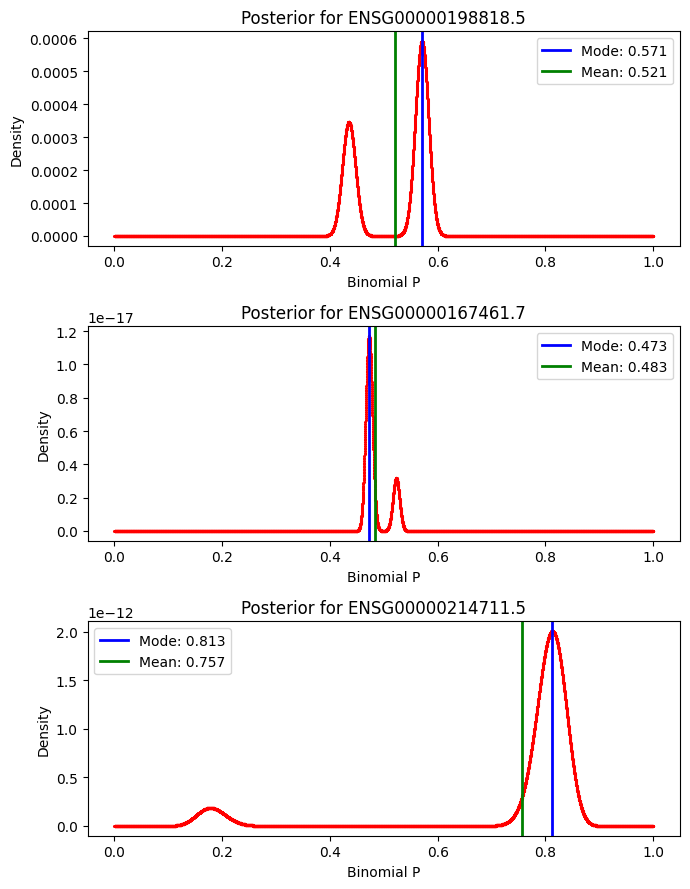

In [197]:
visualize_gene_data('out', 'out.dist', max_genes=20)